# **Retreving The data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
!pip install gdown
file_id = '1gE96Jw_MwbLdISKGVl2Z1ForYQQM509W'
output_file = 'timur1.csv'
#https://drive.google.com/file/d/1gE96Jw_MwbLdISKGVl2Z1ForYQQM509W/view?usp=sharing
#https://drive.google.com/file/d/1-9SYhgu_mgXL-dsx0ljV1WDqH9i58U2C/view
!gdown --id $file_id -O $output_file

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gE96Jw_MwbLdISKGVl2Z1ForYQQM509W
To: /content/timur1.csv
100% 13.0M/13.0M [00:00<00:00, 29.4MB/s]


In [3]:
df = pd.read_csv('/content/timur1.csv', index_col=0)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['timestamp'] = df['Date'].apply(lambda x: pd.Timestamp.timestamp(x))
df=df.drop(columns=['Date'])

In [5]:
X = df.drop(columns=['win'])
y = df['win'].astype(int)

# PCA

10 already done
20 already done
30 already done
40 already done
50 already done


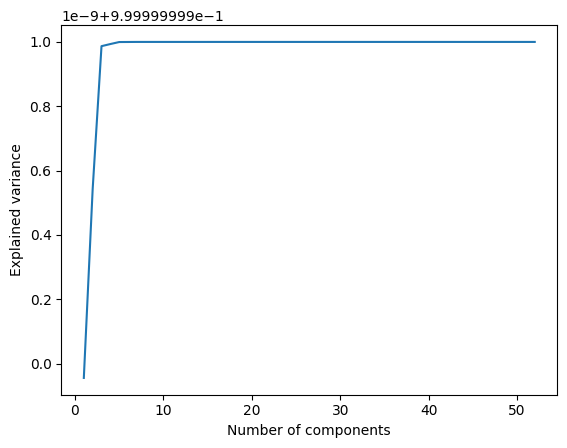

In [6]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# Calculate the explained variance for each number of components
explained_variances = []
for n in range(1, X.shape[1]):
    if n%10 == 0:
      print(n,"already done")
    pca = PCA(n_components=n)
    pca.fit(X)
    explained_variances.append(pca.explained_variance_ratio_.sum())

# Plot the explained variance versus the number of components
plt.plot(range(1, X.shape[1]), explained_variances)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

# Splitting **section**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# xgboost Recommended by Tpot: Tpot_Rec

In [8]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=62dc1b8465fd0d9ee9f42fecd093c3369c172adf1c6bb65b4b437688bbd4fc7c
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [9]:
#Applying the best model 
from tpot import TPOTClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score , f1_score
Tpot = make_pipeline(
    PCA(n_components=10),
    TPOTClassifier(generations=5, population_size=20, verbosity=2, max_time_mins=30)
)
Tpot.fit(X_train, y_train)


Optimization Progress:   0%|          | 0/20 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6614553985091121

Generation 2 - Current best internal CV score: 0.6614553985091121

31.44 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.55, min_samples_leaf=4, min_samples_split=13, n_estimators=100)


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('tpotclassifier',
                 TPOTClassifier(generations=5, max_time_mins=30,
                                population_size=20, verbosity=2))])

In [10]:
accuracy = Tpot.score(X_test, y_test)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


Test accuracy: 0.6562300901064895


In [64]:
#Applying the best model 

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score , f1_score
Tpot_Rec = make_pipeline(
    PCA(n_components=13),
    ExtraTreesClassifier(
        bootstrap=True,
        criterion='gini',
        max_features=0.55,
        min_samples_leaf=4,
        min_samples_split=13,
        n_estimators=100
    )
)
Tpot_Rec.fit(X_train, y_train)


Pipeline(steps=[('pca', PCA(n_components=13)),
                ('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, max_features=0.55,
                                      min_samples_leaf=4,
                                      min_samples_split=13))])

In [ ]:
"""#Applying the best model 
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score , f1_score
Tpot_Rec = make_pipeline(
    PCA(n_components=10),
    XGBClassifier(learning_rate=0.1,
                  max_depth=3,
                  min_child_weight=20,
                  n_estimators=100,
                  n_jobs=1,
                  subsample=0.4,
                  verbosity=2)
)
Tpot_Rec.fit(X_train, y_train)
"""

In [65]:
y_pred = Tpot_Rec.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy of XGBClassifier with best parameters: {accuracy:.3f}')

Test accuracy of XGBClassifier with best parameters: 0.660


In [66]:
y_pred = Tpot_Rec.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7254102850348975

In [52]:
proba = Tpot_Rec.predict_proba(X_test) 
proba

array([[0.9610539 , 0.0389461 ],
       [0.34279019, 0.65720981],
       [0.01423164, 0.98576836],
       ...,
       [0.2109563 , 0.7890437 ],
       [0.39468868, 0.60531132],
       [0.04447865, 0.95552135]])

# Random Forest with cross validation : grid_search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'randomforestclassifier__n_estimators': [100],
    'randomforestclassifier__max_depth': [5,10],
    'randomforestclassifier__min_samples_split': [2,5,10],
    'randomforestclassifier__min_samples_leaf': [1,2,4],
    'randomforestclassifier__max_features': ['auto', 'sqrt']
}
pipline = make_pipeline(
    PCA(n_components=10),
    RandomForestClassifier()
)

# Define the grid search object
grid_search = GridSearchCV(estimator=pipline, param_grid=param_grid, cv=5, n_jobs=-1,  verbose = 2)


# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)


In [34]:
best_rf_model = grid_search.best_estimator_

In [35]:
best_rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Pipeline(steps=[('pca', PCA(n_components=10)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=10, max_features='auto',
                                        min_samples_split=10))])

In [36]:
from joblib import dump
dump(Tpot_Rec, 'Tpot_Rec.joblib')

['Tpot_Rec.joblib']

In [37]:
from joblib import dump
dump(best_rf_model, 'rf_Rec.joblib')

['rf_Rec.joblib']

In [38]:
# Evaluate the best model on the test data
y_pred_grid = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_grid)
print(f'Test accuracy of RandomForestClassifier with best parameters: {accuracy:.3f}')

# Print the best parameters found by the grid search
print('Best parameters:')
for param, value in grid_search.best_params_.items():
    print(f'{param}: {value}')

Test accuracy of RandomForestClassifier with best parameters: 0.658
Best parameters:
randomforestclassifier__max_depth: 10
randomforestclassifier__max_features: auto
randomforestclassifier__min_samples_leaf: 1
randomforestclassifier__min_samples_split: 10
randomforestclassifier__n_estimators: 100


In [39]:
y_pred = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.7214302542778099

# Evaluation

In [87]:
first_year = 2015
last_year = 2020
def split_by_year(X, y):  
  for i in range(first_year, last_year):
    Date = X.date.dt.year
    X_fillterd_train = X.index[Date < i]
    X_fillterd_test = X.index[Date == i]
    yield (X.loc[X_fillterd_train], y.loc[X_fillterd_train], X.loc[X_fillterd_test], y.loc[X_fillterd_test])
def accurecy_of_model_based_on_the_year(model, X, y):
  acc =[]
  j=0
  for X_train, y_train, X_test, y_test in split_by_year(X, y):
    X_train.drop('date',axis=1, inplace=True)
    X_test.drop('date',axis=1, inplace=True)
    model.fit(X_train, y_train)
    y_predicted_probability = model.predict(X_test)
    print(j)
    j+=1
    acc.append(accuracy_score(y_predicted_probability,y_test))
  return acc


In [88]:
X['date'] = pd.to_datetime(X['timestamp'], unit='s')

In [89]:
g_acc_pre_year = accurecy_of_model_based_on_the_year(best_rf_model, X , y)
g_acc_pre_year

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


1


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


2


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


3


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


4


[0.6832635983263599,
 0.6690317195325542,
 0.6333608587943848,
 0.6189482470784641,
 0.6211208893006022]

In [90]:
T_acc_pre_year = accurecy_of_model_based_on_the_year(Tpot_Rec, X , y)
T_acc_pre_year

0
1
2
3
4


[0.6899581589958159,
 0.6715358931552587,
 0.6412056151940545,
 0.6285475792988314,
 0.6424270495599814]

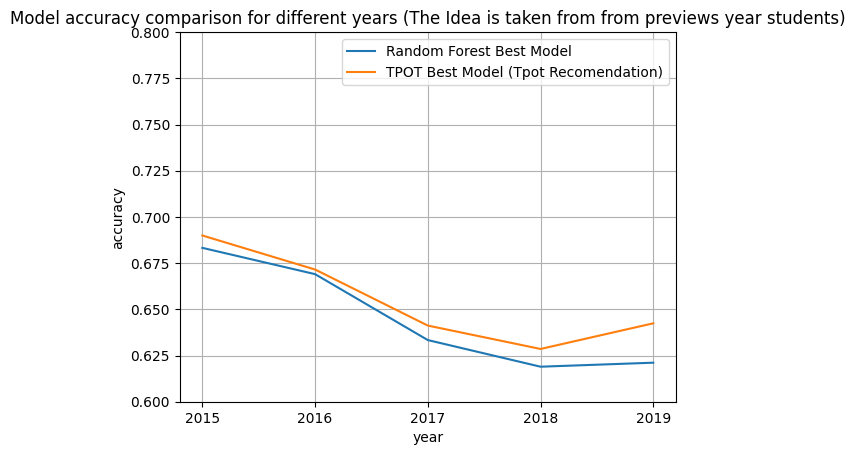

In [94]:
import matplotlib.pyplot as plt

x_val = np.arange(first_year, last_year)
plt.plot(x_val, g_acc_pre_year, label='Random Forest Best Model')
plt.plot(x_val, T_acc_pre_year, label='TPOT Best Model (Tpot Recomendation)')
plt.grid()
plt.legend()
plt.xlabel('year')
plt.xticks(x_val)
plt.ylabel('accuracy')
plt.ylim(0.6, 0.8)
plt.title('Model accuracy comparison for different years (The Idea is taken from from previews year students)')
plt.show()

Evaluation the business 

In [67]:
def calculate_coefficient(win_prob, lose_prob):
    implied_win_prob = 1 / win_prob
    implied_lose_prob = 1 / lose_prob
    total_implied_prob = implied_win_prob + implied_lose_prob

    win_coefficient = implied_win_prob / total_implied_prob
    lose_coefficient = implied_lose_prob / total_implied_prob

    return win_coefficient, lose_coefficient

In [68]:
book_macker_profit_percentage = 0.1
def calculate_coefficient1(win_prob, lose_prob):
    win_coefficient = 1 / (win_prob + book_macker_profit_percentage * 0.5)
    lose_coefficient = 1 / (lose_prob + book_macker_profit_percentage * 0.5)
    return win_coefficient, lose_coefficient

In [69]:
# Get the sorted indices based on the "timestamp" column in X_test
sorted_indices = np.argsort(X_test['timestamp'])

# Sort X_test based on the sorted indices
sorted_X_test = X_test.iloc[sorted_indices].reset_index(drop=True)

# Sort y_test accordingly using the same indices
sorted_y_test = y_test.iloc[sorted_indices].reset_index(drop=True)

In [70]:
X_test = sorted_X_test.copy()
y_test = sorted_y_test.copy()


In [71]:
time_stamp_test = [i for i in X_test.timestamp]
time_stamp_test[:3]

[946857600.0, 946857600.0, 946857600.0]

In [72]:
y_test.index

RangeIndex(start=0, stop=10987, step=1)

In [73]:
proba_predicted_from_Tpot = Tpot_Rec.predict_proba(X_test)[:, 1] # the more it is near to 1 the more it is predict more it is 1
proba_predicted_from_RF = best_rf_model.predict_proba(X_test)[:, 1] # the more it is near to 0 the more it is predict more it is 0

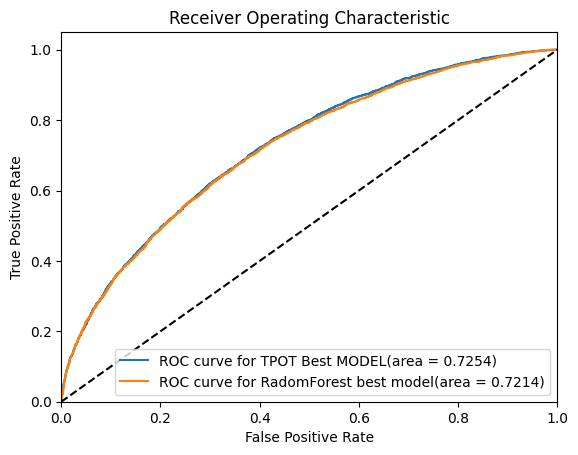

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, proba_predicted_from_Tpot)
roc_auc = roc_auc_score(y_test, proba_predicted_from_Tpot)

fpr1, tpr1, thresholds1 = roc_curve(y_test, proba_predicted_from_RF)
roc_auc1 = roc_auc_score(y_test, proba_predicted_from_RF)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve for TPOT Best MODEL(area = %0.4f)' % roc_auc)
plt.plot(fpr1, tpr1, label='ROC curve for RadomForest best model(area = %0.4f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [75]:
proba_predicted_from_Tpot[2],proba_predicted_from_RF[2]

(0.5667139899194347, 0.5697818501965608)

In [76]:
roc_auc_score(y_test, proba_predicted_from_RF)

0.7214302542778099

In [77]:

def Profit_Validation_Function(C , y_test, proba_predicted_from_Tpot , proba_predicted_from_RF , initial_money):
  Money_in_the_bank  = initial_money
  Winning_Mony = 0
  Money_Change_Rate = []
  Money_increasment = []
  Number_of_matches = -1
  for i in range(len(y_test)):
    P_TPOT = proba_predicted_from_Tpot[i]
    P_RF = proba_predicted_from_RF[i]
    if initial_money*2 < Money_in_the_bank:
      Number_of_matches = i
      break
    if Money_in_the_bank <= 0:
      break
    if P_TPOT > 0.5:
      if y_test[i] == 1:
        Winning_Mony = Money_in_the_bank * C * abs(P_TPOT - 0.5) * calculate_coefficient1(P_RF,1-P_RF)[0]
      else:
        Winning_Mony = -1 * Money_in_the_bank * C * abs(P_TPOT - 0.5) * calculate_coefficient1(P_RF,1-P_RF)[0]
      Money_in_the_bank += Winning_Mony
    elif P_TPOT < 0.5:
      if y_test[i] == 0:
        Winning_Mony = Money_in_the_bank * C * abs(P_TPOT - 0.5) * calculate_coefficient1(P_RF,1-P_RF)[1]
      else:
        Winning_Mony = -1 * Money_in_the_bank * C * abs(P_TPOT - 0.5) * calculate_coefficient1(P_RF,1-P_RF)[1]
      Money_in_the_bank += Winning_Mony
    Money_Change_Rate.append(Winning_Mony)
    Money_increasment.append(Money_in_the_bank)
  return Money_increasment , Money_Change_Rate , Number_of_matches

In [85]:
C = 0.1
initial_money = 100

Money_increasment , Money_Change_Rate , Number_of_matches = Profit_Validation_Function(C , y_test, proba_predicted_from_Tpot , proba_predicted_from_RF , initial_money)

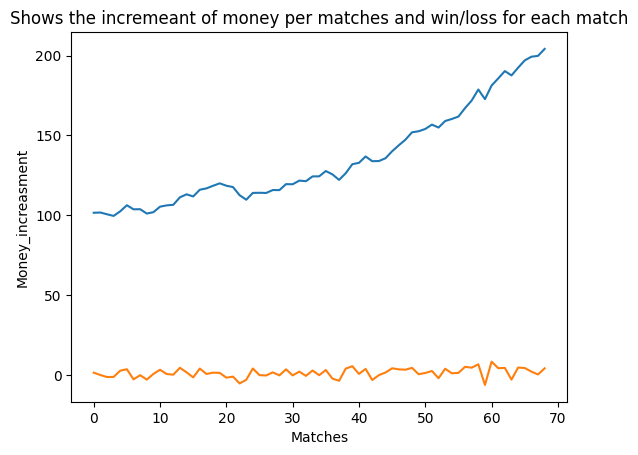

In [86]:
x = range(len(Money_increasment))

# Plot the data
plt.plot(x, Money_increasment , label='Money_in_bank_increasement')
plt.plot(x, Money_Change_Rate , label='Wins_and_loses') 
# Add labels and title
plt.xlabel('Matches')
plt.ylabel('Money_increasment')
plt.title('Shows the incremeant of money per matches and win/loss for each match')

# Display the plot
plt.show()

In [80]:
Risk_Time_Matrix_factor1=[]
Risk_Time_Matrix_factor2=[]
for c in range(1,100):
  C = c*0.01
  initial_money = 10000
  Money_increasment , Money_Change_Rate , Number_of_matches = Profit_Validation_Function(C , y_test, proba_predicted_from_Tpot , proba_predicted_from_RF , initial_money)
  Risk_Time_Matrix_factor1.append(C)
  Risk_Time_Matrix_factor2.append(Number_of_matches)

In [81]:
len(Risk_Time_Matrix_factor1), len(Risk_Time_Matrix_factor2)

(99, 99)

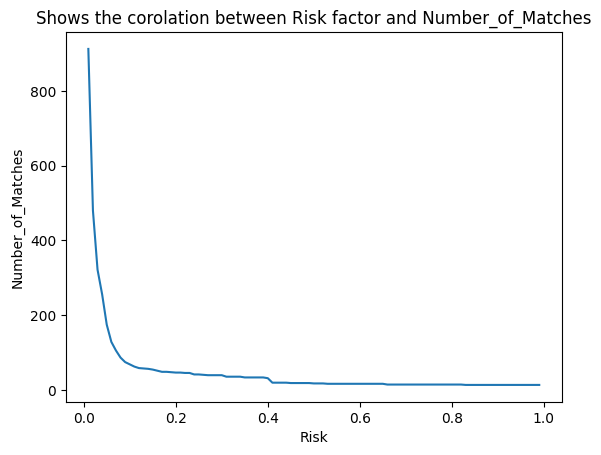

In [82]:
x = Risk_Time_Matrix_factor1

# Plot the data
plt.plot(x, Risk_Time_Matrix_factor2 , label='Risk-Matches-function')
# Add labels and title
plt.xlabel('Risk')
plt.ylabel('Number_of_Matches')
plt.title('Shows the corolation between Risk factor and Number_of_Matches')

# Display the plot
plt.show()